# Aula 7 - Exercícios - Pandas Parte 3 (Merge e Join)

In [1]:
!pip install --upgrade ipynb_autograde > /dev/null

In [2]:
%env  COURSE=mba_enap
from ipynb_autograde.main import init_log, validate
init_log()
email_result=!gcloud config get-value account
if not email_result or 'unset' in email_result[0]:
  !gcloud auth login

env: COURSE=mba_enap
Go to the following link in your browser, and complete the sign-in prompts:

    https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=32555940559.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fsdk.cloud.google.com%2Fauthcode.html&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fappengine.admin+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fsqlservice.login+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcompute+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Faccounts.reauth&state=D7qz4TRPbrPXe4XtSPxjiODRTlubum&prompt=consent&token_usage=remote&access_type=offline&code_challenge=hDWTGTe6uuNuhdReIMyaA9iL8IsPOn1w3aiQDeJnL7g&code_challenge_method=S256

Once finished, enter the verification code provided in your browser: 4/0AanRRru4weP39bqUZeC2PAQ3NJ0mzg-0iaQVHjAosFXnSU_mrAvOLOs0Mxx70F3zLlRqpA

You are now logged in as [alexlopespereira@gmail.c

In [4]:
# Importe a biblioteca pandas
import pandas as pd

### 7.1 Faça um prompt para criar uma função python que integre os dados de PIB de 2017 (Exercício 6.7) e da população de 2017 disponibilizado no link abaixo (não é a do exercício 6.3). Como sugestão, faça um único prompt para carregar os dois arquivos e já integra-los.

#### Entradas: ```https://github.com/alexlopespereira/mba_enap/raw/main/data/originais/pib/pib_municipios.xlsx``` e ```https://github.com/alexlopespereira/mba_enap/raw/refs/heads/main/data/originais/populacao/estimativa_dou_2017.xlsx```

#### Resultado esperado:

Um dataframe exatamente igual a esse

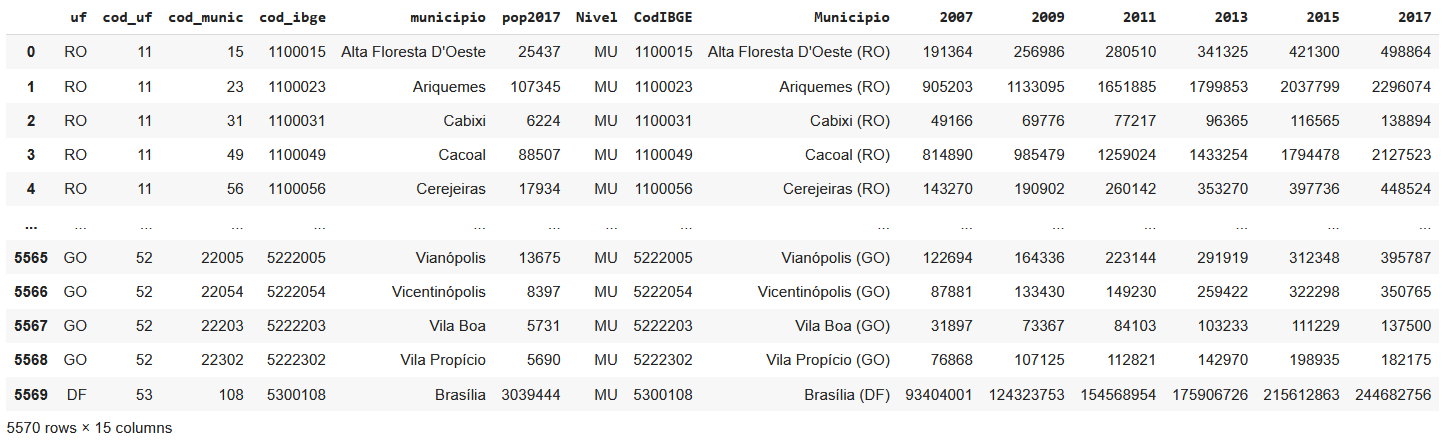


In [ ]:
prompt71 = """Escreva uma função Python utilizando pandas para carregar um arquivo Excel de uma URL passada como 1o argumento interpretando a coluna cod_ibge como string. Nomeie esse dataframe como df_pop. A função tem num segundo argumento o caminho de um arquivo Excel carregue o arquivo ignorando a última linha, forçando a coluna CodIBGE como string, a coluna '2017' como int, e nomeie esse dataframe como df_pib. Faça um merge entre esses dois dataframes, considerando que a chave comum no df_pop se chama cod_ibge e no df_pib se chama CodIBGE. """

In [ ]:
validate(prompt71, "A7-E1")

Codigo gerado: 
{'code': "def merge_pop_pib(url_pop, path_pib):\n    df_pop = pd.read_excel(url_pop, dtype={'cod_ibge': str})\n    df_pib = pd.read_excel(path_pib, skipfooter=1, dtype={'CodIBGE': str, '2017': int})\n    merged_df = pd.merge(df_pop, df_pib, left_on='cod_ibge', right_on='CodIBGE')\n    return merged_df\n", 'status': 'success', 'summary': {'passed_tests': 1, 'success_rate': '100.00%', 'total_tests': 1}, 'test_results': [{'actual': {'aggregation_summary': {'means': {'2013': 957202.6, '2015': 1076442.9, '2017': 1181924.4, 'cod_munic': 15816.9, 'cod_uf': 32.3, 'pop2017': 37282.0}, 'sums': {'2013': 5331618949.0, '2015': 5995786998.0, '2017': 6583318973.0, 'cod_munic': 88100593.0, 'cod_uf': 180344.0, 'pop2017': 207660929.0}, 'total_rows': {'max': 5570, 'min': 5570}}, 'column_analysis': {'expected_columns': ['uf', 'cod_uf', 'cod_munic', 'cod_ibge', 'municipio', 'pop2017', 'Nivel', 'CodIBGE', 'Municipio', '2007', '2009', '2011', '2013', '2015', '2017'], 'missing_columns': [], 'p

In [ ]:
# prompt: Escreva uma função Python utilizando pandas para carregar um arquivo Excel de uma URL passada como 1o argumento interpretando a coluna cod_ibge como string. Nomeie esse dataframe como df_pop. A função tem num segundo argumento o caminho de um arquivo Excel carregue o arquivo ignorando a última linha, forçando a coluna CodIBGE como string, e nomeando esse dataframe como df_pib. Faça um merge entre esses dois dataframes, considerando que a chave comum no df_pop se chama cod_ibge e no df_pib se chama CodIBGE. Faça um código para testar esta função passando 1o argumento a URL carregue os dados desse xlsx num pandas dataframe 'https://github.com/alexlopespereira/mba_enap/raw/refs/heads/main/data/originais/populacao/estimativa_dou_2017.xlsx' e como segundo argumento a url 'https://github.com/alexlopespereira/mba_enap/raw/main/data/originais/pib/pib_municipios.xlsx'.

import pandas as pd

def merge_dataframes(pop_url, pib_url):
    """
    Carrega dois dataframes de URLs de arquivos Excel, converte a coluna 'cod_ibge' para string,
    e realiza um merge entre eles.

    Args:
        pop_url (str): URL do arquivo Excel com dados populacionais.
        pib_url (str): URL do arquivo Excel com dados do PIB.

    Returns:
        pandas.DataFrame: Dataframe resultante do merge.
    """
    try:
        df_pop = pd.read_excel(pop_url, dtype={'cod_ibge': str})
        df_pib = pd.read_excel(pib_url, skipfooter=1, dtype={'CodIBGE': str})

        df_merged = pd.merge(df_pop, df_pib, left_on='cod_ibge', right_on='CodIBGE')
        return df_merged
    except Exception as e:
        print(f"Erro ao carregar ou mesclar os arquivos: {e}")
        return None

# Exemplo de uso:
pop_url = 'https://github.com/alexlopespereira/mba_enap/raw/refs/heads/main/data/originais/populacao/estimativa_dou_2017.xlsx'
pib_url = 'https://github.com/alexlopespereira/mba_enap/raw/main/data/originais/pib/pib_municipios.xlsx'

df_merged = merge_dataframes(pop_url, pib_url)

df_merged.head()

,uf,cod_uf,cod_munic,cod_ibge,municipio,pop2017,Nivel,CodIBGE,Municipio,2007,2009,2011,2013,2015,2017
0,RO,11,15,1100015,Alta Floresta D'Oeste,25437,MU,1100015,Alta Floresta D'Oeste (RO),191364,256986,280510,341325,421300,498864
1,RO,11,23,1100023,Ariquemes,107345,MU,1100023,Ariquemes (RO),905203,1133095,1651885,1799853,2037799,2296074
2,RO,11,31,1100031,Cabixi,6224,MU,1100031,Cabixi (RO),49166,69776,77217,96365,116565,138894
3,RO,11,49,1100049,Cacoal,88507,MU,1100049,Cacoal (RO),814890,985479,1259024,1433254,1794478,2127523
4,RO,11,56,1100056,Cerejeiras,17934,MU,1100056,Cerejeiras (RO),143270,190902,260142,353270,397736,448524


### 7.2 Crie um prompt de uma função para calcular o PIB percapita de 2017 de cada município do Brasil com apenas uma casa decimal, arredonde para baixo (truncar). No seu prompt solicite que as colunas de 2007 a 2011 sejam carregadas como string, e as colunas de 2013 a 2017 sejam carregadas como float64.

#### Entradas: ```https://github.com/alexlopespereira/mba_enap/raw/main/data/originais/pib/pib_municipios.xlsx``` e ```https://github.com/alexlopespereira/mba_enap/raw/refs/heads/main/data/originais/populacao/estimativa_dou_2017.xlsx```

#### Resultado esperado:

Um dataframe exatamente igual a esse

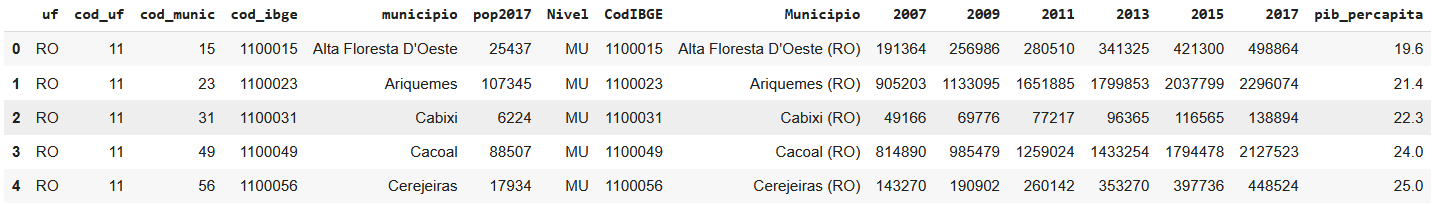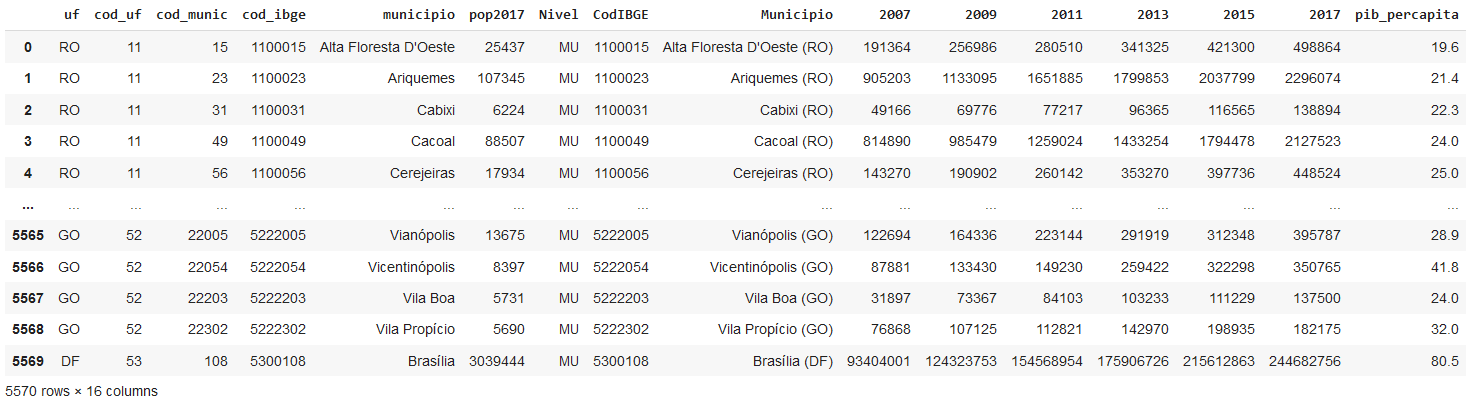

#### Curiosidade: depois de resolver este exercício, peça o seguinte para o a IA do Google Colab: "plote um boxplot interativo, com tooltips nos outliers, do pib_percapita do dataframe df_merged", analise o resultado e comente com o professor.

In [48]:
prompt72="""Escreva uma unica função Python utilizando pandas para carregar um arquivo Excel de uma URL passada como 1o argumento interpretando a coluna cod_ibge como string. Nomeie esse dataframe como df_pop. A função tem num segundo argumento o caminho de um arquivo Excel carregue o arquivo ignorando a última linha, forçando a coluna CodIBGE como string, as colunas 2007 a 2011 como string e de 2013 a 2017 como float64, e nomeando esse dataframe como df_pib. Faça um merge entre esses dois dataframes, considerando que a chave comum no df_pop se chama cod_ibge e no df_pib se chama CodIBGE. Calcule o pib percapita e armazene-o numa nova coluna do dataframe com o nome "pib_percapita", e arrendonde esta coluna para baixo com 0 casa decimal usando uma transformação como esta float(f'{x:.1f}'). O dado do pib de 2017 encontra-se na coluna '2017' e o dado da população encontra-se na coluna 'pop2017'. Não use a engine python para ler o arquivo xlsx"""

In [49]:
validate(prompt72, "A7-E2")

Codigo gerado: 
{'code': "def process_excel_files(url, file_path):\n    # Load the population data from the URL, ensuring 'cod_ibge' is read as string\n    df_pop = pd.read_excel(url, dtype={'cod_ibge': str})\n    \n    # Define the data types for the PIB data\n    dtype_pib = {'CodIBGE': str}\n    for year in ['2007', '2008', '2009', '2010', '2011']:\n        dtype_pib[year] = str\n    for year in ['2013', '2014', '2015', '2016', '2017']:\n        dtype_pib[year] = 'float64'\n    \n    # Load the PIB data from the file path, ignoring the last row\n    df_pib = pd.read_excel(file_path, dtype=dtype_pib, skipfooter=1)\n    \n    # Merge the two dataframes on 'cod_ibge' and 'CodIBGE'\n    df_merged = pd.merge(df_pop, df_pib, left_on='cod_ibge', right_on='CodIBGE')\n    \n    # Calculate PIB per capita and add it as a new column, rounded down to 0 decimal places\n    df_merged['pib_percapita'] = df_merged['2017'] / df_merged['pop2017']\n    df_merged['pib_percapita'] = df_merged['pib_perca

In [45]:
pop_url = 'https://github.com/alexlopespereira/mba_enap/raw/refs/heads/main/data/originais/populacao/estimativa_dou_2017.xlsx'
pib_url = 'https://github.com/alexlopespereira/mba_enap/raw/main/data/originais/pib/pib_municipios.xlsx'

df_pop = pd.read_excel(pop_url, dtype={'cod_ibge': str})
df_pib = pd.read_excel(pib_url, skipfooter=1, dtype={'CodIBGE': str})
df_merged = pd.merge(df_pop, df_pib, left_on='cod_ibge', right_on='CodIBGE')
df_merged['pib_percapita'] = df_merged['2017'] / df_merged['pop2017']
df_merged['pib_percapita'] = df_merged['pib_percapita'].apply(lambda x: float(f'{x:.1f}'))
df_merged

,uf,cod_uf,cod_munic,cod_ibge,municipio,pop2017,Nivel,CodIBGE,Municipio,2007,2009,2011,2013,2015,2017,pib_percapita
0,RO,11,15,1100015,Alta Floresta D'Oeste,25437,MU,1100015,Alta Floresta D'Oeste (RO),191364,256986,280510,341325,421300,498864,19.6
1,RO,11,23,1100023,Ariquemes,107345,MU,1100023,Ariquemes (RO),905203,1133095,1651885,1799853,2037799,2296074,21.4
2,RO,11,31,1100031,Cabixi,6224,MU,1100031,Cabixi (RO),49166,69776,77217,96365,116565,138894,22.3
3,RO,11,49,1100049,Cacoal,88507,MU,1100049,Cacoal (RO),814890,985479,1259024,1433254,1794478,2127523,24.0
4,RO,11,56,1100056,Cerejeiras,17934,MU,1100056,Cerejeiras (RO),143270,190902,260142,353270,397736,448524,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,GO,52,22005,5222005,Vianópolis,13675,MU,5222005,Vianópolis (GO),122694,164336,223144,291919,312348,395787,28.9
5566,GO,52,22054,5222054,Vicentinópolis,8397,MU,5222054,Vicentinópolis (GO),87881,133430,149230,259422,322298,350765,41.8
5567,GO,52,22203,5222203,Vila Boa,5731,MU,5222203,Vila Boa (GO),31897,73367,84103,103233,111229,137500,24.0
5568,GO,52,22302,5222302,Vila Propício,5690,MU,5222302,Vila Propício (GO),76868,107125,112821,142970,198935,182175,32.0


### 7.3 Incremente o prompt do exercício anterior, adicionando uma instrução para que ele retorne os top 10 registros de maior PIB percapita

#### Entradas: ```https://github.com/alexlopespereira/mba_enap/raw/main/data/originais/pib/pib_municipios.xlsx``` e ```'https://github.com/alexlopespereira/mba_enap/raw/refs/heads/main/data/originais/populacao/estimativa_dou_2017.xlsx'```

#### Resultado esperado:

Um dataframe exatamente igual a esse

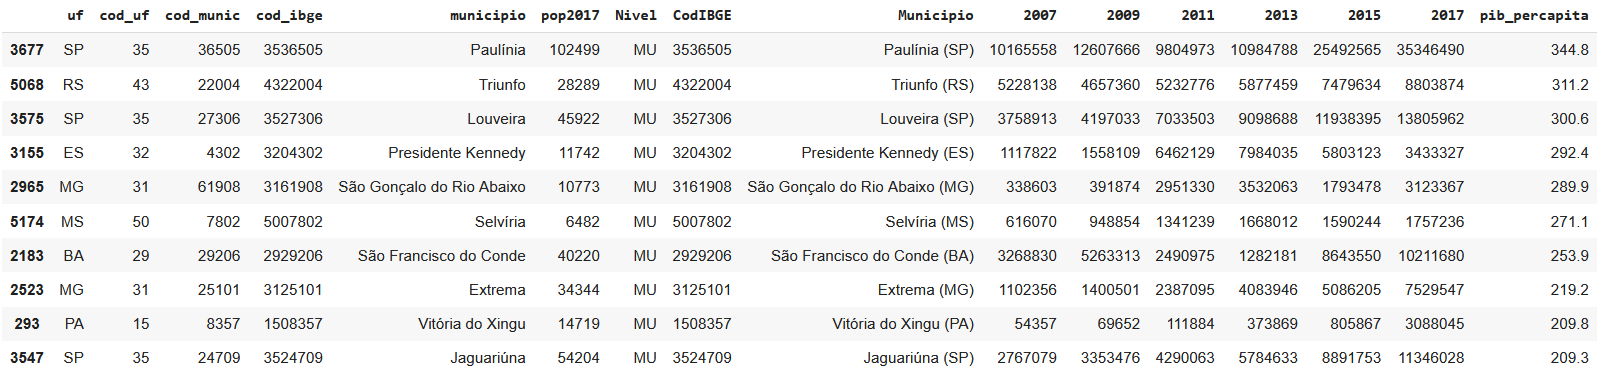

In [56]:
prompt73 = """Escreva uma unica função Python utilizando pandas para carregar um arquivo Excel de uma URL passada como 1o argumento interpretando a coluna cod_ibge como string. Nomeie esse dataframe como df_pop. A função tem num segundo argumento o caminho de um arquivo Excel carregue o arquivo ignorando a última linha, forçando a coluna CodIBGE como string, as colunas 2007 a 2011 como string e de 2013 a 2017 como float64, e nomeando esse dataframe como df_pib. Faça um merge entre esses dois dataframes, considerando que a chave comum no df_pop se chama cod_ibge e no df_pib se chama CodIBGE. Calcule o pib percapita e armazene-o numa nova coluna do dataframe com o nome "pib_percapita", e arrendonde esta coluna para baixo com 0 casa decimal usando uma transformação como esta float(f'{x:.1f}'). O dado do pib de 2017 encontra-se na coluna '2017' e o dado da população encontra-se na coluna 'pop2017'. Não use a engine python para ler o arquivo xlsx. Retorne os 10 registros de maior pib_percapita."""

In [57]:
validate(prompt73, "A7-E3")

Codigo gerado: 
{'code': "def process_data(url, excel_path):\n    df_pop = pd.read_excel(url, dtype={'cod_ibge': str})\n    df_pib = pd.read_excel(excel_path, skipfooter=1, dtype={\n        'CodIBGE': str,\n        '2007': str,\n        '2008': str,\n        '2009': str,\n        '2010': str,\n        '2011': str,\n        '2013': float,\n        '2014': float,\n        '2015': float,\n        '2016': float,\n        '2017': float\n    })\n\n    merged_df = pd.merge(df_pop, df_pib, left_on='cod_ibge', right_on='CodIBGE')\n    merged_df['pib_percapita'] = (merged_df['2017'] / merged_df['pop2017']).apply(lambda x: float(f'{x:.1f}'))\n    \n    return merged_df.nlargest(10, 'pib_percapita')", 'status': 'success', 'summary': {'passed_tests': 0, 'success_rate': '0.00%', 'total_tests': 1}, 'test_results': [{'actual': {}, 'error': ['Sum mismatch for column cod_uf. Expected 180344.0, got 336.0', 'Sum mismatch for column cod_munic. Expected 88100593.0, got 247200.0', 'Sum mismatch for column po

In [40]:
# prompt: Escreva uma unica função Python utilizando pandas para carregar um arquivo Excel de uma URL passada como 1o argumento interpretando a coluna cod_ibge como string. Nomeie esse dataframe como df_pop. A função tem num segundo argumento o caminho de um arquivo Excel carregue o arquivo ignorando a última linha, forçando a coluna CodIBGE como string, e nomeando esse dataframe como df_pib. Faça um merge entre esses dois dataframes, considerando que a chave comum no df_pop se chama cod_ibge e no df_pib se chama CodIBGE. Calcule o pib percapita e armazene-o numa nova coluna do dataframe como o nome "pib_percapita" e arrendonde para baixo com uma casa decimal. O dado do pib de 2017 encontra-se na coluna '2017' e o dado da população encontra-se na coluna 'pop2017'. Faça um código para testar esta função passando 1o argumento a URL carregue os dados desse xlsx num pandas dataframe 'https://github.com/alexlopespereira/mba_enap/raw/refs/heads/main/data/originais/populacao/estimativa_dou_2017.xlsx' e como segundo argumento a url 'https://github.com/alexlopespereira/mba_enap/raw/main/data/originais/pib/pib_municipios.xlsx'. Não use a engine python para ler o arquivo xlsx

import pandas as pd

def process_data(pop_url, pib_url):
    """
    Loads population and PIB data from Excel files, merges them, calculates PIB per capita,
    and returns the top 10 records with the highest PIB per capita.
    """
    try:
        df_pop = pd.read_excel(pop_url, dtype={'cod_ibge': str})
        df_pib = pd.read_excel(pib_url, dtype={'CodIBGE': str}, skipfooter=1)

        df = pd.merge(df_pop, df_pib, left_on='cod_ibge', right_on='CodIBGE')
        df['pib_percapita'] = df['2017'] / df['pop2017']
        df['pib_percapita'] = df['pib_percapita'].apply(lambda x: float(f'{x:.1f}'))

        # Get the top 10 records with the highest PIB per capita
        top_10_pib_percapita = df.nlargest(10, 'pib_percapita')
        return top_10_pib_percapita

    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Example usage (for testing):
pop_url = 'https://github.com/alexlopespereira/mba_enap/raw/refs/heads/main/data/originais/populacao/estimativa_dou_2017.xlsx'
pib_url = 'https://github.com/alexlopespereira/mba_enap/raw/main/data/originais/pib/pib_municipios.xlsx'

result_df = process_data(pop_url, pib_url)

result_df

,uf,cod_uf,cod_munic,cod_ibge,municipio,pop2017,Nivel,CodIBGE,Municipio,2007,2009,2011,2013,2015,2017,pib_percapita
3677,SP,35,36505,3536505,Paulínia,102499,MU,3536505,Paulínia (SP),10165558,12607666,9804973,10984788,25492565,35346490,344.8
5068,RS,43,22004,4322004,Triunfo,28289,MU,4322004,Triunfo (RS),5228138,4657360,5232776,5877459,7479634,8803874,311.2
3575,SP,35,27306,3527306,Louveira,45922,MU,3527306,Louveira (SP),3758913,4197033,7033503,9098688,11938395,13805962,300.6
3155,ES,32,4302,3204302,Presidente Kennedy,11742,MU,3204302,Presidente Kennedy (ES),1117822,1558109,6462129,7984035,5803123,3433327,292.4
2965,MG,31,61908,3161908,São Gonçalo do Rio Abaixo,10773,MU,3161908,São Gonçalo do Rio Abaixo (MG),338603,391874,2951330,3532063,1793478,3123367,289.9
5174,MS,50,7802,5007802,Selvíria,6482,MU,5007802,Selvíria (MS),616070,948854,1341239,1668012,1590244,1757236,271.1
2183,BA,29,29206,2929206,São Francisco do Conde,40220,MU,2929206,São Francisco do Conde (BA),3268830,5263313,2490975,1282181,8643550,10211680,253.9
2523,MG,31,25101,3125101,Extrema,34344,MU,3125101,Extrema (MG),1102356,1400501,2387095,4083946,5086205,7529547,219.2
293,PA,15,8357,1508357,Vitória do Xingu,14719,MU,1508357,Vitória do Xingu (PA),54357,69652,111884,373869,805867,3088045,209.8
3547,SP,35,24709,3524709,Jaguariúna,54204,MU,3524709,Jaguariúna (SP),2767079,3353476,4290063,5784633,8891753,11346028,209.3


### 7.4 Escreva uma função para fazer o merge do dataset de morbidade consolidado com o dataset de população
#### O dataset da população deve ficar a esquerda e o dataset da morbidade a direita no resultado.
#### Dica 1: No dataset de morbidade existem valores NA representados por caracteres específicos em várias colunas do dataframe. Descubra quais são esses caracteres e especifiquei no argumento na_values. Passe nesse argumento uma lista como os caracteres que devem ser interpretados como NA.
#### Dica 2: No dataset de morbidade, especifique o separador, o caracter de números decimais e o tipo do dado do cod_ibge6 como str. Ou seja, dtype={'cod_ibge6': str}.
#### Dica 3: No dataset de população, converta o cod_munic e cod_uf para str no momento de carregar o dataset de população, usando novamente o argumento dtype.
#### Dica 4: No dataset de população, construa o código ibge de 6 dígitos do município a partir das colunas ```cod_uf``` e ```cod_munic```.


In [ ]:
def merge_morbidade_pop(path_pop, path_morbidade):
    """retorne o merge dos datasets de população e morbidade.
    """
    ### BEGIN SOLUTION
    df_pop = pd.read_excel(path_pop, sheet_name="Municipios", dtype={'cod_munic': str, 'cod_uf': str})
    # Concatena o codigo da UF com o codigo do municipio
    df_pop['cod_ibge6'] = df_pop['cod_uf'] + df_pop['cod_munic'].apply(lambda x: x[:-1])
    df_morbidade = pd.read_csv(path_morbidade, sep=';', decimal=',', dtype={'cod_ibge6': str},
                               na_values=['-', '...'])
    return pd.merge(df_pop, df_morbidade, on='cod_ibge6')
    ### END SOLUTION


In [ ]:
## Faça seus testes aqui
path_morbidade = 'https://github.com/alexlopespereira/enapespcd2021/raw/main/data/originais/morbidade/consolidado/morbidade.csv'
path_pop = 'https://github.com/alexlopespereira/enapespcd2021/raw/main/data/originais/populacao/estimativa_dou_2017.xlsx'


In [ ]:
path_morbidade = 'https://github.com/alexlopespereira/enapespcd2021/raw/main/data/originais/morbidade/consolidado/morbidade.csv'
path_pop = 'https://github.com/alexlopespereira/enapespcd2021/raw/main/data/originais/populacao/estimativa_dou_2017.xlsx'
test_data = {'Internações': 149, 'AIH_aprovadas': 149, 'Valor_total': 101282.26}

entradas = [[path_pop, path_morbidade]]
saidas = [{'Internações': 149, 'AIH_aprovadas': 149, 'Valor_total': 101282.26}]
val1 = validate(merge_morbidade_pop, entradas, lambda x: x[(x['mes']=='Abr') & (x['cod_munic']=='00015')].loc[:,['Internações', 'AIH_aprovadas', 'Valor_total']].to_dict(orient='records')[0], saidas, "7.4", False)
if not val1:
    val2 = validate(top10, entradas, lambda x: x.iloc[0, 8:11].to_dict(), saidas, "7.4", False)
    print(val2)
else:
    print(val1)